# Solution of Ordinary Differential Equation

## First order differential equation

We are finding the solution of a differential euation $y'=-2y$ with initial values as $y(0)=1$. In this case we know the exact solution and the exact solution is given by $y(t) = e^{-2t}$.

### Eular's method

Euler's method is the simplest numerical scheme to approximate the solution of an ODE.  
It uses the slope at the beginning of the interval to estimate the value of the solution at the next step.  
If $h$ is the step size, the iteration formulas are
\begin{equation}
y_{n+1} = y_n + h \, f(x_n, y_n),
\end{equation}
\begin{equation}
x_{n+1} = x_n + h.
\end{equation}
Euler's method is \emph{first-order accurate}, meaning the global error decreases linearly with the step size $h$.

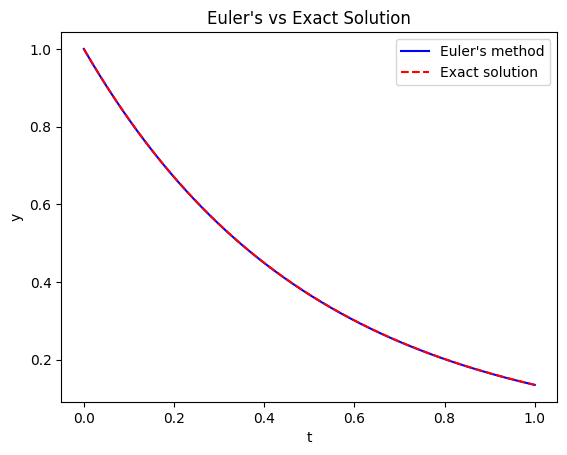

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def func(t,y):
    f = -2.0*y
    return f

def euler_rec(h,t0, y0):
    y1 = y0 + h*func(t0, y0)
    return y1

def plot(method,t,y,yex):
    plt.plot(t,y,'b-',label = "{} method".format(method))
    plt.plot(t,yex,'r--',label = "Exact solution")
    plt.xlabel("t")
    plt.ylabel("y")
    plt.title("{} vs Exact Solution".format(method))
    plt.legend()
    plt.show()

t0 = 0.0
y0 = 1.0
h = 0.001
t1 = 1.0
t, y, yex = [t0] , [y0] , [y0]

while t0<1:
    y1 = euler_rec(h,t0,y0)
    yexi = np.exp(-2.0*(t0+h))
    y0 = y1
    t.append(t0+h)
    y.append(y1)
    yex.append(yexi)
    t0= t0+h

plot("Euler's",t,y,yex)

### Runge Kutta Method

We shall solve the same equation we solved earlier.

The RK4 method improves accuracy by evaluating the slope at several points within each interval and taking a weighted average.  
The formulas are

\begin{equation}
k_1 = f(x_n, y_n),
\end{equation}
\begin{equation}
k_2 = f\!\Big(x_n + \tfrac{h}{2}, \; y_n + \tfrac{h}{2}k_1\Big),
\end{equation}
\begin{equation}
k_3 = f\!\Big(x_n + \tfrac{h}{2}, \; y_n + \tfrac{h}{2}k_2\Big),
\end{equation}
\begin{equation}
k_4 = f\!\Big(x_n + h, \; y_n + h k_3\Big),
\end{equation}
\begin{equation}
y_{n+1} = y_n + \frac{h}{6}\big(k_1 + 2k_2 + 2k_3 + k_4\big),
\end{equation}
\begin{equation}
x_{n+1} = x_n + h.
\end{equation}

The RK4 method is \emph{fourth-order accurate}, so its global error decreases proportionally to $h^4$.  
It provides a very good balance between accuracy and computational effort, and is one of the most widely used methods for solving ODEs numerically.



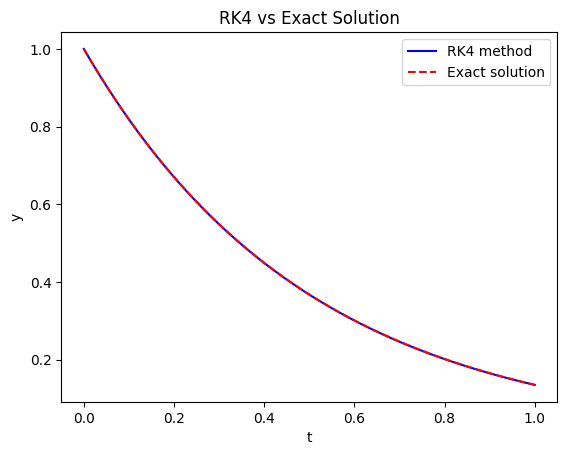

In [2]:
func = lambda t,y: -2.0*y
RK4_k1 = lambda t0,y0 : func(t0,y0)
RK4_k2 = lambda h, t0, y0 : func((t0+ h/2.0), (y0 + (h/2.0)*RK4_k1(t0,y0)))
RK4_k3 = lambda h, t0, y0 : func((t0+ h/2.0), (y0 + (h/2.0)*RK4_k2(h, t0,y0)))
RK4_k4 = lambda h, t0, y0 : func((t0+ h), (y0 + h*RK4_k3(h, t0,y0)))
RK4_iter = lambda h, t0, y0 : y0 + (h/6.0)*(RK4_k1(t0,y0) + 2.0 * RK4_k2(h,t0,y0) + 2.0 * RK4_k3(h,t0,y0) + RK4_k4(h,t0,y0))

t0 = 0.0
y0 = 1.0 # Initial Value
h = 0.001
t1 = 1.0
t, y, yex = [t0] , [y0] , [y0]

while t0<1:
    y1 = euler_rec(h,t0,y0)
    yexi = np.exp(-2.0*(t0+h))
    y0 = y1
    t.append(t0+h)
    y.append(y1)
    yex.append(yexi)
    t0= t0+h

plot("RK4",t,y,yex)

## Second Order Differential Equation


### Using Eular's Method

Consider the second-order ODE
\begin{equation}
y''(x) = f(x, y, y'), \quad y(x_0) = y_0, \quad y'(x_0) = v_0.
\end{equation}

Since Euler's method applies to first-order equations, we reduce the problem to a system.  
Define
\begin{equation}
y_1 = y, \quad y_2 = y' = \frac{dy}{dx}.
\end{equation}

Then the second-order ODE becomes the system
\begin{equation}
\frac{dy_1}{dx} = y_2,
\end{equation}
\begin{equation}
\frac{dy_2}{dx} = f(x, y_1, y_2).
\end{equation}

Applying Euler's method with step size $h$, the update rules are
\begin{equation}
y_{1,n+1} = y_{1,n} + h \cdot y_{2,n},
\end{equation}
\begin{equation}
y_{2,n+1} = y_{2,n} + h \cdot f(x_n, y_{1,n}, y_{2,n}),
\end{equation}
\begin{equation}
x_{n+1} = x_n + h.
\end{equation}



### Example: Simple Harmonic Oscillator
Consider
\begin{equation}
y''(x) = -y(x), \quad y(0)=0, \quad y'(0)=1.
\end{equation}
This is equivalent to the system
\begin{equation}
y_1' = y_2,
\end{equation}
\begin{equation}
y_2' = -y_1.
\end{equation}
The Euler update formulas are
\begin{equation}
y_{1,n+1} = y_{1,n} + h y_{2,n},
\end{equation}
\begin{equation}
y_{2,n+1} = y_{2,n} - h y_{1,n}.
\end{equation}
The exact solution is $y(x) = \sin(x)$, and Euler's method provides an approximation that becomes more accurate as $h \to 0$.

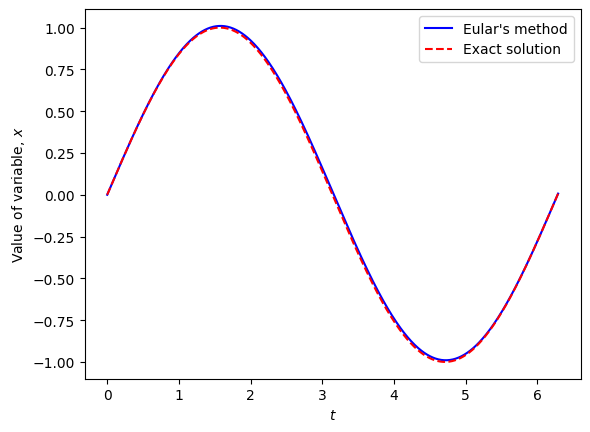

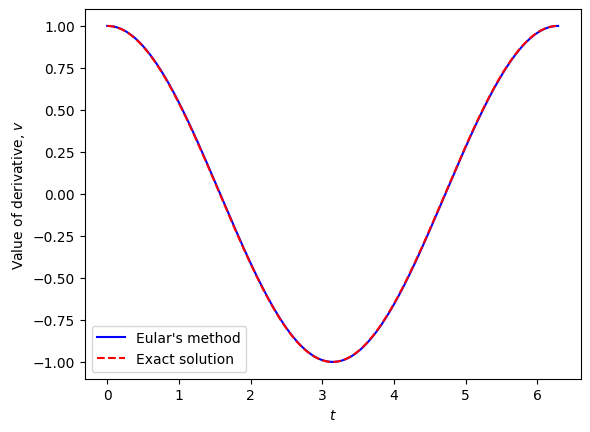

In [3]:
import numpy as np
import matplotlib.pyplot as plt

func = lambda x, y1, y2 : - np.sin(x)
def Eular2_iter(h, x0, y10, y20):
    x1 = x0 + h
    y11 = y10 + h*y20
    y21 = y20 + h*func(x0, y10, y20)
    return x1, y11, y21

def plot_variable(method,x0s,y10s,y10_exact_s):
    plt.plot(x0s,y10s,"b-",label="{} method".format(method))
    plt.plot(x0s,y10_exact_s,"r--",label="Exact solution".format(method))
    plt.xlabel("$t$")
    plt.ylabel("Value of variable, $x$")
    plt.legend()
    plt.show()

def plot_derivative(method,x0s,y20s,y20_exact_s):
    plt.plot(x0s,y20s,"b-",label="{} method".format(method))
    plt.plot(x0s,y20_exact_s,"r--",label="Exact solution".format(method))
    plt.xlabel("$t$")
    plt.ylabel("Value of derivative, $v$")
    plt.legend()
    plt.show()

x0 = 0.0 #Starting Point
xend = 2.0*np.pi #Final Value
y10 = 0.0 # Initial Value
y20 = 1.0 # Initial value of the derivative
y10_exact = np.sin(x0) # Exact initial Value
y20_exact = np.cos(x0) # Exact initial value of the derivative
h = 0.01 #Iterator
x0s, y10s, y20s, y10_exact_s, y20_exact_s = [x0] , [y10] , [y20] , [y10_exact], [y20_exact]

while x0<xend:
    [x1, y11, y21] = Eular2_iter(h, x0, y10, y20)
    x0 , y10, y20 = x1, y11, y21
    x0s.append(x0)
    y10s.append(y10)
    y20s.append(y20)
    y10_exact_s.append(np.sin(x0))
    y20_exact_s.append(np.cos(x0))

plot_variable("Eular's",x0s,y10s,y10_exact_s)
plot_derivative("Eular's",x0s,y20s,y20_exact_s)



### Using Runge-Kutta method (RK4) 

Consider the second-order differential equation
\begin{equation}
\frac{d^2x}{dt^2} = f(t, x, v), \quad x(t_0) = x_0, \quad v(t_0) = v_0,
\end{equation}
where
\begin{equation}
v = \frac{dx}{dt}.
\end{equation}

This is equivalent to the system
\begin{equation}
\frac{dx}{dt} = v, \qquad \frac{dv}{dt} = f(t, x, v).
\end{equation}

The RK4 method proceeds by computing intermediate slopes for $x$ and $v$.  
With step size $h$ we define
\begin{equation}
k_{1x} = v_n, \qquad k_{1v} = f(t_n, x_n, v_n),
\end{equation}
\begin{equation}
k_{2x} = v_n + \tfrac{h}{2}k_{1v}, \qquad
k_{2v} = f\!\Big(t_n + \tfrac{h}{2}, \; x_n + \tfrac{h}{2}k_{1x}, \; v_n + \tfrac{h}{2}k_{1v}\Big),
\end{equation}
\begin{equation}
k_{3x} = v_n + \tfrac{h}{2}k_{2v}, \qquad
k_{3v} = f\!\Big(t_n + \tfrac{h}{2}, \; x_n + \tfrac{h}{2}k_{2x}, \; v_n + \tfrac{h}{2}k_{2v}\Big),
\end{equation}
\begin{equation}
k_{4x} = v_n + h k_{3v}, \qquad
k_{4v} = f\!\Big(t_n + h, \; x_n + h k_{3x}, \; v_n + h k_{3v}\Big).
\end{equation}

The updates are then given by
\begin{equation}
x_{n+1} = x_n + \frac{h}{6}\left(k_{1x} + 2k_{2x} + 2k_{3x} + k_{4x}\right),
\end{equation}
\begin{equation}
v_{n+1} = v_n + \frac{h}{6}\left(k_{1v} + 2k_{2v} + 2k_{3v} + k_{4v}\right),
\end{equation}
\begin{equation}
t_{n+1} = t_n + h.
\end{equation}

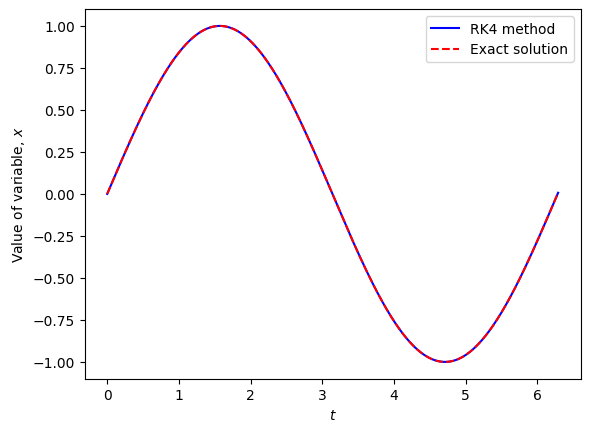

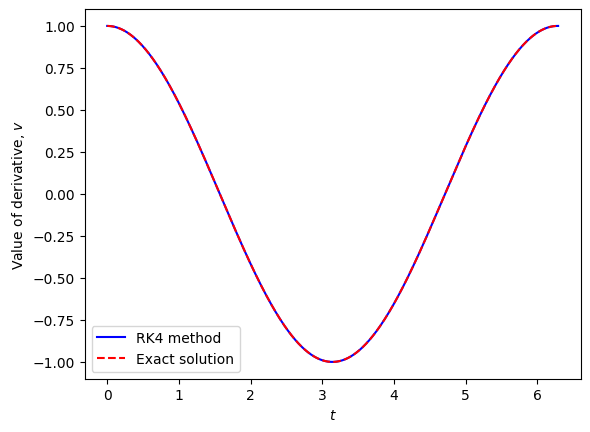

In [4]:
import numpy as np
import matplotlib.pyplot as plt

func = lambda t, x, v : - np.sin(t)

def RK4d_iter(h, t0, x0, v0):
    k1x = v0
    k1v = func(t0, x0, v0)
    k2x = v0 + (h/2.0)*k1v
    k2v = func((t0+h/2.0), (x0+(h/2.0)*k1x), (v0+(h/2.0)*k1v))
    k3x = v0 + (h/2.0)*k2v
    k3v = func((t0+h/2.0),(x0+(h/2.0)*k2x), (v0+(h/2.0)*k2v))
    k4x = v0 + h*k3v
    k4v = func((t0+h), (x0+h*k3x), (v0+h*k3v))
    t1 = t0 + h
    x1 = x0 + (h/6.0)*(k1x + 2.0*k2x + 2.0*k3x + k4x)
    v1= v0 + (h/6.0)*(k1v + 2.0*k2v + 2.0*k3v + k4v)
    return t1,x1,v1

t0 = 0.0 #Starting Point
tend = 2.0*np.pi #Final Value
x0 = 0.0 # Initial Value
v0 = 1.0 # Initial value of the derivative
x0_exact = np.sin(x0) # Exact initial Value
v0_exact = np.cos(x0) # Exact initial value of the derivative
h = 0.01 #Iterator
t0s, x0s, v0s, x0_exact_s, v0_exact_s = [t0] , [x0] , [v0] , [x0_exact], [v0_exact]

while t0<tend:
    [t1, x1, v1] = RK4d_iter(h, t0, x0, v0)
    t0 , x0, v0 = t1, x1, v1
    t0s.append(t0)
    x0s.append(x0)
    v0s.append(v0)
    x0_exact_s.append(np.sin(t0))
    v0_exact_s.append(np.cos(t0))

plot_variable("RK4",t0s,x0s,x0_exact_s)
plot_derivative("RK4",t0s,v0s,v0_exact_s)
